<a href="https://colab.research.google.com/github/ArMOUNO/deep_learning_models/blob/Flowers-recognition-and-Helth-prediction/Own_customize_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='flower.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('flower.zip')
f.keys()
!unzip flower.zip

Streaming output truncated to the last 5000 lines.
  inflating: flower/0015/1006.jpg    
  inflating: flower/0015/10065.jpg   
  inflating: flower/0015/10066.jpg   
  inflating: flower/0015/10070.jpg   
  inflating: flower/0015/10073.jpg   
  inflating: flower/0015/10075.jpg   
  inflating: flower/0015/10076.jpg   
  inflating: flower/0015/10077.jpg   
  inflating: flower/0015/10078.jpg   
  inflating: flower/0015/1008.jpg    
  inflating: flower/0015/10083.jpg   
  inflating: flower/0015/10086.jpg   
  inflating: flower/0015/10087.jpg   
  inflating: flower/0015/1009.jpg    
  inflating: flower/0015/10092.jpg   
  inflating: flower/0015/10093.jpg   
  inflating: flower/0015/10095.jpg   
  inflating: flower/0015/10097.jpg   
  inflating: flower/0015/10100.jpg   
  inflating: flower/0015/10101.jpg   
  inflating: flower/0015/10102.jpg   
  inflating: flower/0015/10105.jpg   
  inflating: flower/0015/10110.jpg   
  inflating: flower/0015/10111.jpg   
  inflating: flower/0015/10112.jpg   

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.13.0


In [ ]:
dataset = '/content/flower'
#validation_dir = '/content/BDNRB/validation'
#test_dir = '/content/BDNRB/test'



BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(dataset,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 validation_split=.20,
                                                                 subset='training',
                                                                 seed=66)
validation_dataset = tf.keras.utils.image_dataset_from_directory(dataset,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 validation_split=.20,
                                                                 subset='validation',
                                                                 seed=66)
#test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
#                                                                shuffle=True,
#                                                                batch_size=BATCH_SIZE,
#                                                                image_size=IMG_SIZE)

Found 14400 files belonging to 24 classes.
Using 11520 files for training.
Found 14400 files belonging to 24 classes.
Using 2880 files for validation.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        #layers.RandomContrast(factor=0.1),
        layers.RandomBrightness(factor=0.1),

        layers.RandomZoom(height_factor=0.1, width_factor=0.1),

        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Randomly translate images

    ]
)


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D

In [ ]:
# x is input, y=F(x)
# identity block simply means input should be equal to output.
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.



def identity_block(X, f, filters, stage, block):


    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Saving the input value.we need this later to add to the output.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1),  padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (3, 3), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X = Activation('relu')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    # First layer
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)


    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (3, 3), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X = Activation('relu')(X)

    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
#Each ResNet block is either 2 layer deep
def floweNet(input_shape=(224, 224, 3), classes=24):


    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (3, 3), strides=(2, 2), name='conv1')(X) #64 filters of 7*7
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = data_augmentation(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 128], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 128], stage=2, block='b')




    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 256], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 256], stage=3, block='b')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 512], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 512], stage=4, block='b')



    # Stage 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 1028], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 1028], stage=5, block='b')

    # Stage 6
    X = convolutional_block(X, f = 3, filters = [1028, 1028, 2048], stage = 6, block='a', s = 2)
    X = identity_block(X, 3, [1028, 1028, 2048], stage=6, block='b')


    # AVGPOOL
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='floweNe')
    return model


In [ ]:
model = floweNet(input_shape=(224, 224, 3), classes=24)
model.summary()


Model: "floweNe"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 114, 114, 64)         1792      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1[0][0]']         

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-3),  loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
epochs = 100
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/100
360/360 [==============================] - 132s 231ms/step - loss: 4.2634 - accuracy: 0.0419 - val_loss: 3.4148 - val_accuracy: 0.0424
Epoch 2/100
360/360 [==============================] - 82s 228ms/step - loss: 3.5181 - accuracy: 0.0532 - val_loss: 3.1675 - val_accuracy: 0.0458
Epoch 3/100
360/360 [==============================] - 83s 229ms/step - loss: 3.5684 - accuracy: 0.0515 - val_loss: 3.0658 - val_accuracy: 0.0788
Epoch 4/100
360/360 [==============================] - 83s 229ms/step - loss: 3.3029 - accuracy: 0.0707 - val_loss: 3.0919 - val_accuracy: 0.0983
Epoch 5/100
360/360 [==============================] - 82s 228ms/step - loss: 2.9879 - accuracy: 0.1370 - val_loss: 2.1480 - val_accuracy: 0.2823
Epoch 6/100
360/360 [==============================] - 82s 228ms/step - loss: 2.8471 - accuracy: 0.1806 - val_loss: 4.4136 - val_accuracy: 0.2333
Epoch 7/100
360/360 [==============================] - 82s 228ms/step - loss: 2.5495 - accuracy: 0.2260 - val_loss: 1.6955 

In [ ]:
scores = model.evaluate(validation_dataset)

90/90 [==============================] - 5s 58ms/step - loss: 0.1070 - accuracy: 0.9681


1/1 [==============================] - 0s 29ms/step


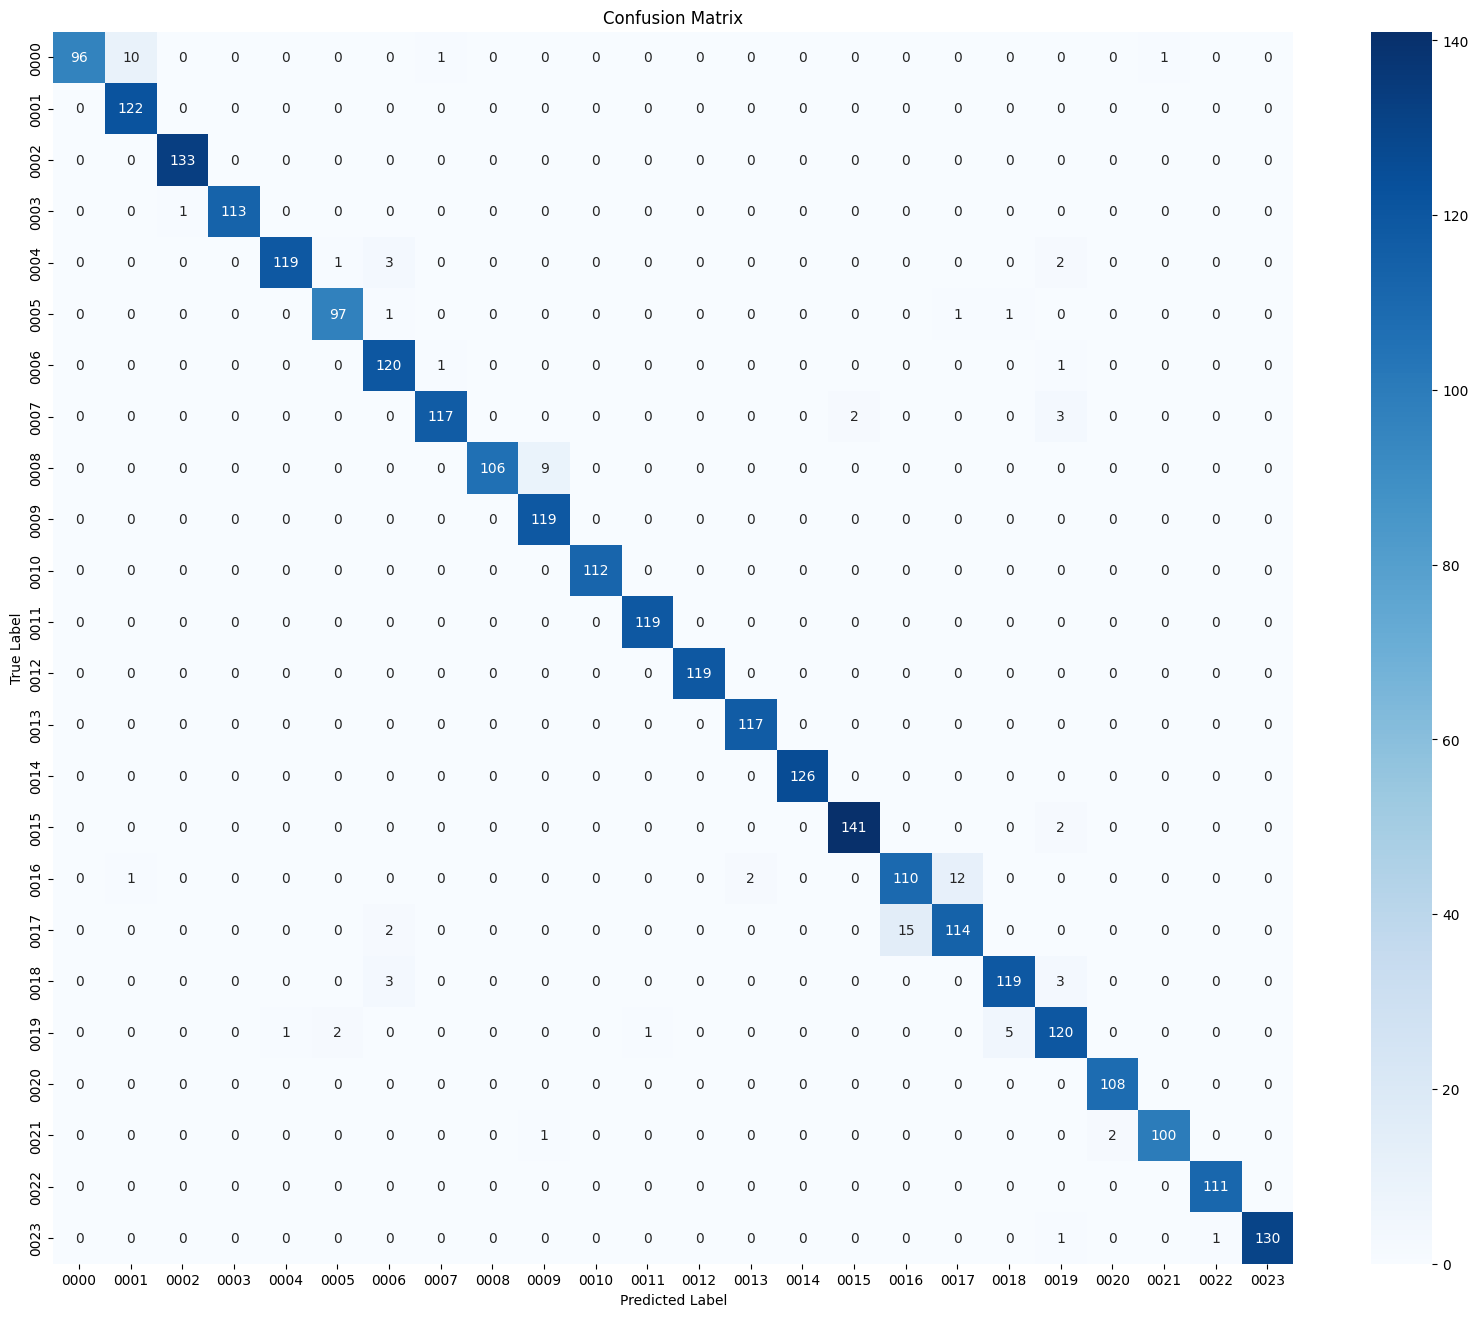

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace 'Class 0' and 'Class 1' with the actual class names from your dataset
class_names = validation_dataset.class_names

# Create empty arrays to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to obtain true and predicted labels
for images, labels in validation_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

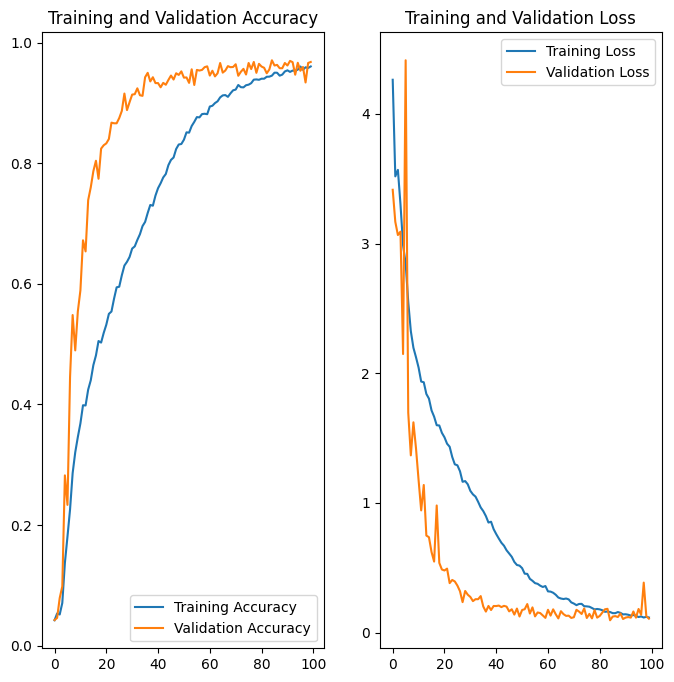

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
nb_classes=24

# After model.fit(...)
validation_dataset = validation_dataset.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in validation_dataset:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC curves (only for binary classification or when using one-hot encoded labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(nb_classes):
   plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 23ms/step
